https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

## pre-processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/DL_Course'

/content/drive/MyDrive/Colab Notebooks/DL_Course


In [ ]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [ ]:
import os
import numpy as np

data_path='/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages'

categories=os.listdir(data_path)
print(categories)
labels=np.arange(len(categories))
print(labels)
label_dict=dict(zip(categories,labels))
print(label_dict)

['Dog', 'Cat']
[0 1]
{'Dog': 0, 'Cat': 1}


In [ ]:
import cv2
img_size=50

data=[]
target=[]

for category in categories:

  category_path=os.path.join(data_path,category)
  img_names=os.listdir(category_path)

  for img_name in img_names:
    img_path=os.path.join(category_path, img_name)
    #print(img_path)
    try:
      img=cv2.imread(img_path)
      img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      img=cv2.resize(img,(img_size,img_size))
      data.append(img)
      target.append(label_dict[category])
    except Exception as e:
      print(img_path,e)


/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/9188.jpg OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/Thumbs.db OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/8730.jpg OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/7369.jpg OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/7459.jpg OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtCo

In [ ]:
data_new=np.array(data)
target_new=np.array(target)

In [ ]:
print(data_new.shape)
print(target_new.shape)

(24946, 50, 50)
(24946,)


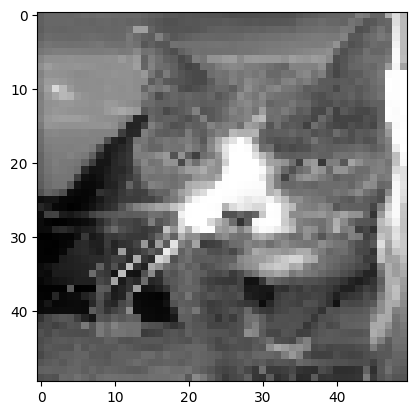

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(data[24945], cmap='gray')

In [ ]:
target_new[24945]

1

In [ ]:
print(data_new.shape)
print(data_new.shape[0], data_new.shape[1],data_new.shape[2])

(24946, 50, 50)
24946 50 50


In [ ]:
data_new=data_new.reshape(data_new.shape[0], data_new.shape[1],data_new.shape[2],1) # converting to 4D, CNN needs 4D input
print(data_new.shape)

(24946, 50, 50, 1)


In [ ]:
data_new=data_new/255 #normalizing/ Scaling
# from keras import np_utils
# target_new=np_utils.to_categorical(target_new)
from tensorflow.keras.utils import to_categorical
target_new = to_categorical(target_new)

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/cat_and_dog_data', data_new)
np.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/cat_and_dog_target', target_new)

## Tran Model

In [ ]:
import numpy as np

data=np.load('/content/drive/MyDrive/Colab Notebooks/DL_Course/cat_and_dog_data.npy')
target=np.load('/content/drive/MyDrive/Colab Notebooks/DL_Course/cat_and_dog_target.npy')

In [ ]:
# Reshape the target array
# target_new=[]
# for i in target:
#   target_new.append(i[0])
# target = np.array(target_new)

In [ ]:
print(data.shape)
print(target.shape)

(24946, 50, 50, 1)
(24946, 2)


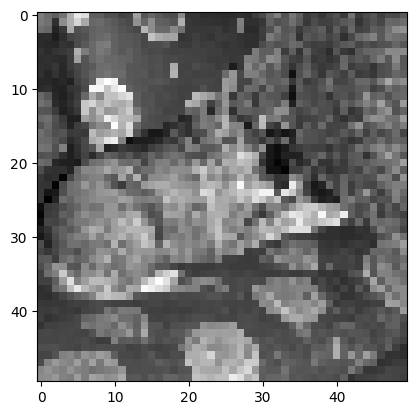

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(data[1], cmap='gray')

In [ ]:
target[1]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
data[1]

array([[[[1.90695886e-03],
         [1.98385236e-03],
         [2.02998847e-03],
         ...,
         [2.09150327e-03],
         [2.15301807e-03],
         [2.18377547e-03]],

        [[1.89158016e-03],
         [1.99923106e-03],
         [2.01460977e-03],
         ...,
         [2.10688197e-03],
         [2.16839677e-03],
         [2.18377547e-03]],

        [[1.87620146e-03],
         [1.99923106e-03],
         [1.96847366e-03],
         ...,
         [2.12226067e-03],
         [2.19915417e-03],
         [2.18377547e-03]],

        ...,

        [[3.69088812e-04],
         [3.69088812e-04],
         [3.07574010e-04],
         ...,
         [1.72241446e-03],
         [9.53479431e-04],
         [9.68858131e-04]],

        [[3.53710111e-04],
         [3.07574010e-04],
         [4.45982314e-04],
         ...,
         [9.84236832e-04],
         [1.86082276e-03],
         [2.10688197e-03]],

        [[3.38331411e-04],
         [4.30603614e-04],
         [5.07497116e-04],
         ...,
 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model=Sequential()

# model.add(Conv2D(128, (3,3), input_shape=data.shape[1:],padding='same'))
model.add(Conv2D(64, (3,3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (5,5)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 activation_22 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 22, 22, 32)        18464     
                                                                 
 activation_23 (Activation)  (None, 22, 22, 32)        0         
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 11, 11, 32)        0         
 ng2D)                                                

In [ ]:
history=model.fit(data,target,epochs=20, validation_split=0.2, batch_size=32)

Epoch 1/20
624/624 [==============================] - 7s 8ms/step - loss: 0.6640 - accuracy: 0.6247 - val_loss: 0.9686 - val_accuracy: 0.0000e+00
Epoch 2/20
624/624 [==============================] - 5s 8ms/step - loss: 0.6620 - accuracy: 0.6249 - val_loss: 0.9526 - val_accuracy: 0.0000e+00
Epoch 3/20
624/624 [==============================] - 5s 8ms/step - loss: 0.6625 - accuracy: 0.6249 - val_loss: 0.9602 - val_accuracy: 0.0000e+00
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.6617 - accuracy: 0.6249 - val_loss: 1.0439 - val_accuracy: 0.0000e+00
Epoch 5/20
624/624 [==============================] - 6s 9ms/step - loss: 0.6622 - accuracy: 0.6249 - val_loss: 0.9993 - val_accuracy: 0.0000e+00
Epoch 6/20
624/624 [==============================] - 5s 7ms/step - loss: 0.6619 - accuracy: 0.6249 - val_loss: 0.9504 - val_accuracy: 0.0000e+00
Epoch 7/20
624/624 [==============================] - 4s 7ms/step - loss: 0.6619 - accuracy: 0.6249 - val_loss: 0.9804 - val

KeyboardInterrupt: 

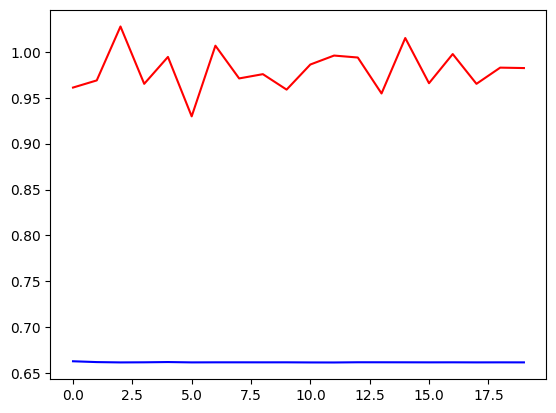

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')

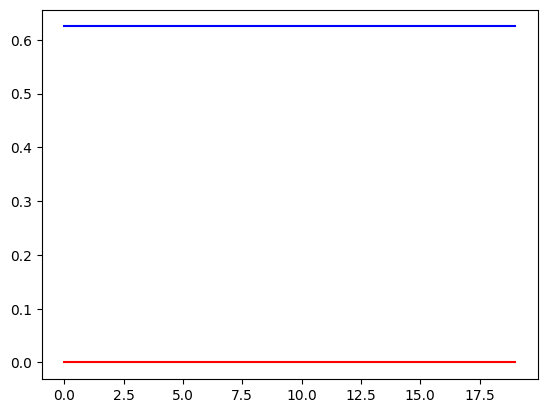

In [ ]:
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')

### Data Preprocessing - Memory-Save

In [ ]:
import os
import numpy as np

data_path='/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages'

categories=os.listdir(data_path)
print(categories)
labels=np.arange(len(categories))
print(labels)
label_dict=dict(zip(categories,labels))
print(label_dict)

['Dog', 'Cat']
[0 1]
{'Dog': 0, 'Cat': 1}


In [ ]:
import cv2
img_size=50

data=[]
target=[]

for category in categories:

  category_path=os.path.join(data_path,category)
  img_names=os.listdir(category_path)

  for img_name in img_names:
    img_path=os.path.join(category_path, img_name)
    #print(img_path)
    try:
      img=cv2.imread(img_path)
      img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      img=cv2.resize(img,(img_size,img_size))
      data.append(img_path)
      target.append(label_dict[category])
    except Exception as e:
      print(img_path,e)


/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/9188.jpg OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/Thumbs.db OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/8730.jpg OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/7369.jpg OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/7459.jpg OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtCo

In [ ]:
data_new=np.array(data)
target_new=np.array(target)

In [ ]:
print(data_new.shape)
print(target_new.shape)

(24946,)
(24946,)


In [ ]:
data_new[0]

'/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/911.jpg'

In [ ]:
target_new[0]

0

In [ ]:
from tensorflow.keras.utils import to_categorical
target_new = to_categorical(target_new)

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/data-memory-save',data_new)
np.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/target-memory-save',target_new)

### Train using data memory save

In [ ]:
import numpy as np

data=np.load('/content/drive/MyDrive/Colab Notebooks/DL_Course/data-memory-save.npy')
target=np.load('/content/drive/MyDrive/Colab Notebooks/DL_Course/target-memory-save.npy')

In [ ]:
print(data.shape)
print(target.shape)

(24946,)
(24946, 2)


In [ ]:
print(data[0])
print(target[0])

/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/911.jpg
[1. 0.]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model=Sequential()

model.add(Conv2D(128, (3,3), input_shape=(50,50,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 activation_6 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 64)        204864    
                                                                 
 activation_7 (Activation)   (None, 20, 20, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                 

In [ ]:
import cv2
import os

img_size=50

def batcher(data, target):
  global img_size, batch_size

  def preprocess(img_name):
    img=cv2.imread(os.path.abspath(img_name))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(img_size,img_size))/255
    return img.reshape(img_size,img_size,1)

  while(True):
    data_new=[]
    target_new=[]

    #inds=np.arange(i, i+batch_size)
    inds=np.random.randint(0,len(data),batch_size)
    #print(inds)
    for index in inds:
      data_new.append(preprocess(data[index]))
      target_new.append(target[index])

    yield np.array(data_new), np.array(target_new)

In [ ]:
inds=np.random.randint(0,2500,32)
print(inds)

[2375 1700 1808  928 2195 1377  726 2425   30 2370  539 1846  907  297
 2468  748 1472 1722 2216  542  117 1814 1727 1645 1707  353 1405  499
  473 1950 1729  738]


In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)

In [ ]:
print(train_data[:10])

['/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Cat/10828.jpg'
 '/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Cat/10447.jpg'
 '/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Cat/11399.jpg'
 '/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/9311.jpg'
 '/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/7475.jpg'
 '/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Cat/11409.jpg'
 '/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/941.jpg'
 '/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/2890.jpg'
 '/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Cat/6888.jpg'
 '/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Cat/2318.jpg']


In [ ]:
500//32

15

In [ ]:
# model.fit(data, target, epoches=20, validation_split=0.2, batch_size=32)

In [ ]:
batch_size = 32

model.fit(batcher(train_data, train_target), epochs=20, validation_data=batcher(test_data, test_target), batch_size=batch_size, steps_per_epoch=len(train_data) // batch_size, validation_steps=len(test_data) // batch_size)

Epoch 1/20
 10/623 [..............................] - ETA: 1:08:17 - loss: 0.6867 - accuracy: 0.5500

KeyboardInterrupt: 

### Test Code (1)

In [1]:
import numpy as np

data = np.load('/content/drive/MyDrive/Colab Notebooks/DL_Course/cat_and_dog_data.npy')
target = np.load('/content/drive/MyDrive/Colab Notebooks/DL_Course/cat_and_dog_target.npy')

In [2]:
target[1]

array([1., 0.], dtype=float32)

In [3]:
data[1]

array([[[0.00199923],
        [0.00176855],
        [0.00159938],
        ...,
        [0.00132257],
        [0.00129181],
        [0.00152249]],

       [[0.00193772],
        [0.00181469],
        [0.0009381 ],
        ...,
        [0.00170704],
        [0.0016609 ],
        [0.00178393]],

       [[0.00178393],
        [0.00167628],
        [0.00078431],
        ...,
        [0.00183007],
        [0.00219915],
        [0.00230681]],

       ...,

       [[0.00132257],
        [0.00207612],
        [0.0023837 ],
        ...,
        [0.00101499],
        [0.00110727],
        [0.00112265]],

       [[0.00212226],
        [0.00230681],
        [0.00212226],
        ...,
        [0.00124567],
        [0.00121492],
        [0.00116878]],

       [[0.00218378],
        [0.00221453],
        [0.00236832],
        ...,
        [0.00126105],
        [0.0012303 ],
        [0.00113802]]])

In [4]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
# Build the CNN model
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(2, activation='softmax')  # Output layer with 2 neurons (for binary classification)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('softmax'))

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001, verbose=1)


# Compile the model
# optimizer = Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 activation_5 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        73792     
                                                                 
 activation_6 (Activation)   (None, 22, 22, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                 

In [11]:
# Train the model
history=model.fit(train_data, train_target, epochs=100, batch_size=32, validation_data=(test_data, test_target),callbacks=[reduce_lr])

Epoch 1/100
624/624 [==============================] - 7s 10ms/step - loss: 0.6933 - accuracy: 0.4956 - val_loss: 0.6934 - val_accuracy: 0.4900 - lr: 0.0010
Epoch 2/100
624/624 [==============================] - 5s 8ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5100 - lr: 0.0010
Epoch 3/100
624/624 [==============================] - 5s 8ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4900 - lr: 0.0010
Epoch 4/100
624/624 [==============================] - 5s 8ms/step - loss: 0.6932 - accuracy: 0.4942 - val_loss: 0.6932 - val_accuracy: 0.4900 - lr: 0.0010
Epoch 5/100
621/624 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.4987
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
624/624 [==============================] - 5s 8ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5100 - lr: 0.0010
Epoch 6/100
624/624 [==============================] - 5s

KeyboardInterrupt: 

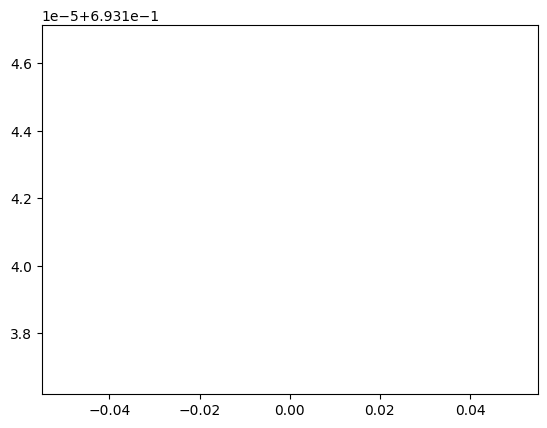

In [7]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')

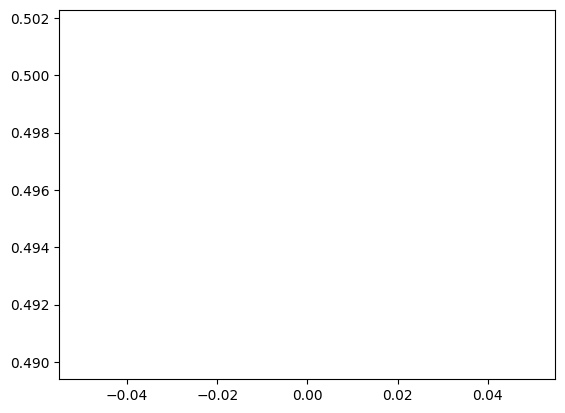

In [8]:
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/cat_dog_v1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Test

In [ ]:
from tensorflow.keras.models import load_model
# Load the model
model = load_model('/content/drive/MyDrive/Colab Notebooks/DL_Course/cat_dog_v1.h5')

In [9]:
import os
import cv2
import numpy as np

img_path='/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Cat/0.jpg'
img=cv2.imread(img_path)

test_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
test_img=cv2.resize(test_img, (50, 50))
test_img=test_img/255.0
test_img=test_img.reshape(1, 50, 50, 1)

result=model.predict(test_img)
print(result)

1/1 [==============================] - 1s 556ms/step
[[0.53235 0.46765]]


1/1 [==============================] - 0s 28ms/step
[[1. 0.]] 0
Dog


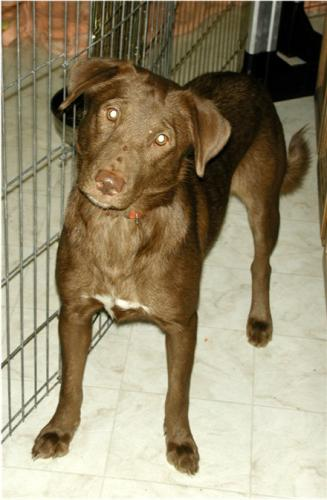

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

category_dict={0:'Dog', 1:'Cat'}

img_path='/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Dog/1.jpg'
img=cv2.imread(img_path)

test_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
test_img=cv2.resize(test_img, (50, 50))
test_img=test_img/255.0
test_img=test_img.reshape(1, 50, 50, 1)

result=model.predict(test_img)
label=np.argmax(result,axis=1)[0]
print(result, label)
print(category_dict[label])

cv2_imshow(img)  # Use cv2_imshow() instead of cv2.imshow()

In [ ]:
from fastapi import FastAPI, File, UploadFile
from typing import List
import cv2
import numpy as np

app = FastAPI()

category_dict = {0: 'Dog', 1: 'Cat'}

@app.post("/predict_cat_dog/")
async def predict_cat_dog(image: UploadFile = File(...)):
    contents = await image.read()
    nparr = np.frombuffer(contents, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (50, 50))
    test_img = img / 255.0
    test_img = test_img.reshape(1, 50, 50, 1)

    result = model.predict(test_img)
    label = np.argmax(result, axis=1)[0]
    return {"prediction": category_dict[label]}


ModuleNotFoundError: No module named 'fastapi'

Test Code (2)

In [12]:
import numpy as np

data = np.load('/content/drive/MyDrive/Colab Notebooks/DL_Course/cat_and_dog_data.npy')
target = np.load('/content/drive/MyDrive/Colab Notebooks/DL_Course/cat_and_dog_target.npy')

In [100]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional layers
# model.add(Conv2D(32, (3, 3), input_shape=data.shape[1:]))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), input_shape=data.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())


model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 48, 48, 16)        160       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 24, 24, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 22, 22, 64)        9280      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 7744)              0         
                                                                 
 dense_35 (Dense)            (None, 256)             

In [101]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [102]:
# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001, verbose=1)

In [103]:
# Train the model
history=model.fit(train_data, train_target, epochs=20, batch_size=32, validation_data=(test_data, test_target),callbacks=[reduce_lr])

Epoch 1/20
624/624 [==============================] - 5s 6ms/step - loss: 0.6961 - accuracy: 0.4935 - val_loss: 0.6930 - val_accuracy: 0.5100 - lr: 0.0010
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.6940 - accuracy: 0.5011 - val_loss: 0.6918 - val_accuracy: 0.5721 - lr: 0.0010
Epoch 3/20
624/624 [==============================] - 3s 5ms/step - loss: 0.6865 - accuracy: 0.5426 - val_loss: 0.6681 - val_accuracy: 0.5814 - lr: 0.0010
Epoch 4/20
624/624 [==============================] - 3s 5ms/step - loss: 0.6649 - accuracy: 0.5968 - val_loss: 0.6417 - val_accuracy: 0.6357 - lr: 0.0010
Epoch 5/20
624/624 [==============================] - 3s 5ms/step - loss: 0.6435 - accuracy: 0.6312 - val_loss: 0.6287 - val_accuracy: 0.6543 - lr: 0.0010
Epoch 6/20
624/624 [==============================] - 4s 6ms/step - loss: 0.6263 - accuracy: 0.6512 - val_loss: 0.6092 - val_accuracy: 0.6741 - lr: 0.0010
Epoch 7/20
624/624 [==============================] - 3s 5ms/step - lo

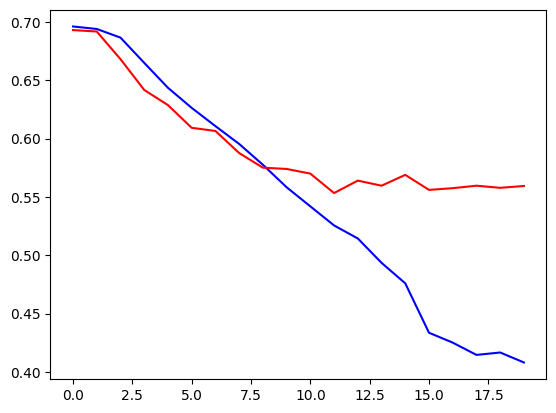

In [104]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')

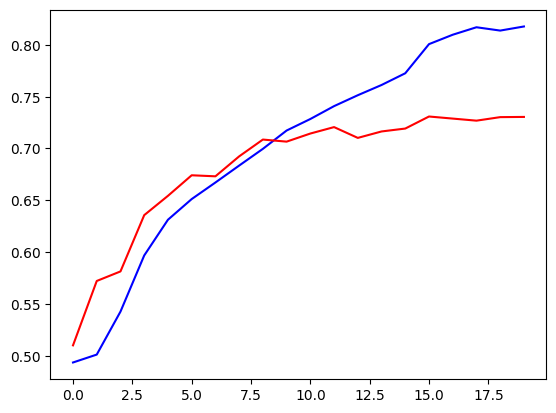

In [105]:
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')

1/1 [==============================] - 0s 72ms/step
[[0. 1.]] 1
Cat


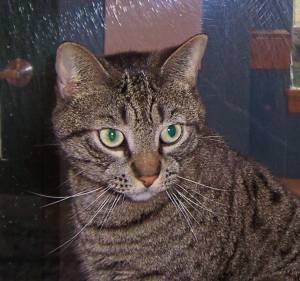

In [107]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

category_dict={0:'Dog', 1:'Cat'}

img_path='/content/drive/MyDrive/Colab Notebooks/DL_Course/PetImages/Cat/1.jpg'
img=cv2.imread(img_path)

test_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
test_img=cv2.resize(test_img, (50, 50))
test_img=test_img/255.0
test_img=test_img.reshape(1, 50, 50, 1)

result=model.predict(test_img)
label=np.argmax(result,axis=1)[0]
print(result, label)
print(category_dict[label])

cv2_imshow(img)  # Use cv2_imshow() instead of cv2.imshow()

In [108]:
model.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/cat_dog_v2_test2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
